## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

## Data collection and analysis


In [2]:
#loading dataset
customer_data=pd.read_csv('Mall_Customers.csv')

In [3]:
#first 5 rows
customer_data.head()
#number of rows and columns
customer_data.shape

(200, 5)

In [4]:
#getting info
customer_data.info


<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [5]:
#checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Choosing annual income and spending score column

In [6]:
X= customer_data.iloc[:,[3,4]].values

## Choosing number of clusters (wcss : within cluster sum of squares)

In [7]:
#finding wcss value for diff nu. of clusters

wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

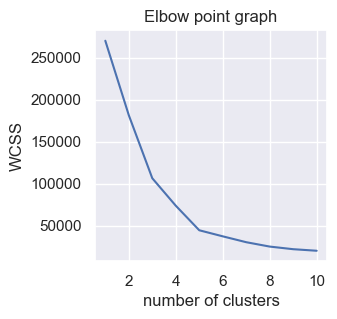

In [8]:
#plotting an elbow graph
sns.set()
plt.figure(figsize=(3,3))
plt.plot(range(1,11),wcss)
plt.title('Elbow point graph')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()


## Optimum number of clusters are 5
## Training the k-means clustering

In [9]:
kmeans=KMeans(n_clusters=5,init='k-means++', random_state=0)
#predict label for each cluster from 0 to 4
Y=kmeans.fit_predict(X)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


## Visualizing the clusters

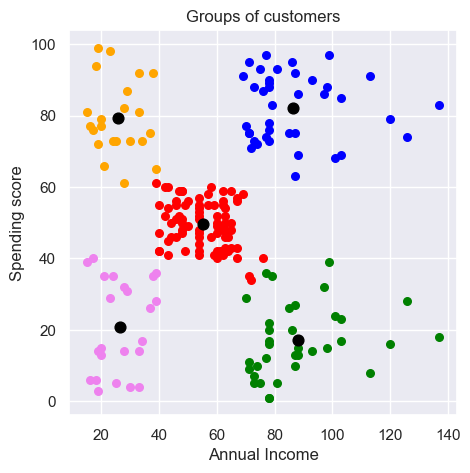

In [10]:
# plotting the clusters and their centroids on a scatter plot
plt.figure(figsize=(5,5))
# here 2,0 means 2nd cluster and x[0]
plt.scatter(X[Y==0,0], X[Y==0,1], s=30, c='red', label='cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=30, c='blue', label='cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=30, c='green', label='cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=30, c='violet', label='cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=30, c='orange', label='cluster 5')
#plotting centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=60, c='black',label='centroid')

plt.title('Groups of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.show()